# Wine Clustering

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    - Dataset size was reduced from 125,000 rows to 22,000 rows
    
"""

data = pd.read_csv("3column_clean.csv")
print(data.shape)
data.head()

(125105, 17)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,690,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,450,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2,436,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,3,479,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,440,2012


In [3]:
# Extract data for clustering and analysis 

clustering_data = data.loc[:,['province_id','variety_numerical','vintage']]
clustering_data.head()

,province_id,variety_numerical,vintage
0,0,690,2013
1,1,450,2011
2,2,436,2013
3,3,479,2013
4,2,440,2012


In [5]:
# Helper function to count the number of samples in each cluster

def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return

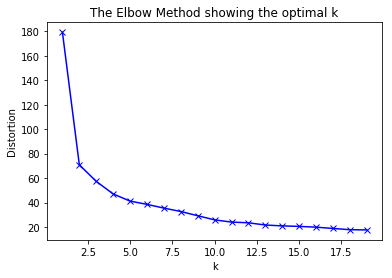

In [6]:
# Determine k using elbow method

X = np.array(list(zip(data.loc[:,'province_id'], data.loc[:,'variety_numerical']))).reshape(len(data.loc[:,'province_id']),2)

# k means determine k
distortions=[]
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:

n = 8
cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)
data.loc[:,['province_id','variety_numerical','vintage']]




Clusters:
{6: 8619, 1: 40146, 7: 17817, 5: 9887, 0: 36752, 2: 8719, 4: 3155, 3: 10}


,province_id,variety_numerical,vintage
0,0,690,2013
1,1,450,2011
2,2,436,2013
3,3,479,2013
4,2,440,2012
5,4,590,2011
6,0,186,2013
7,5,209,2012
8,6,209,2013
9,5,436,2012


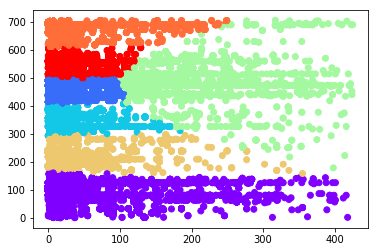

In [8]:
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

In [9]:
# Agglomerative Clustering was attempted. However, the dataset was too large to successfully run the algorithm 

'''
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='average').fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)
'''

'\ncluster = AgglomerativeClustering(n_clusters=n, affinity=\'euclidean\', linkage=\'average\').fit(clustering_data)\n\nlabels = cluster.labels_\nprint("\n\nClusters:")\nlabel_count(labels)\n'

In [10]:
# Plot for agglomerative clustering

'''
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()
'''

"\nplt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    \nplt.show()\n"

## add analysis

In [11]:
# Using Gaussian Mixture Model (GMM)
warnings.simplefilter('ignore')
gmm = mixture.GaussianMixture(n_components=n).fit(clustering_data)
labels = gmm.predict(clustering_data)
print("\n\nClusters:")
label_count(labels)



Clusters:
{3: 6409, 6: 21704, 0: 37078, 1: 32909, 5: 10274, 7: 16515, 2: 206, 4: 10}


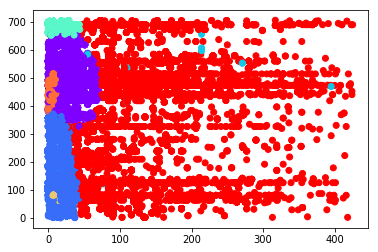

In [12]:
# Visual Representation using the GMM Algorithm

plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

In [11]:
# Retrieve Wine Enthusiast Point Rating and Price column from dataset

data.dropna(subset=['points','price'],inplace=True)
clustering_data = data.loc[:,['points','price']]
clustering_data.head()

,points,price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0


In [12]:
# Using k-means clustering on dataset based on points and price for each wine.

cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 33503, 1: 778, 2: 7, 3: 17198, 4: 203, 5: 60552, 6: 4310, 7: 40}


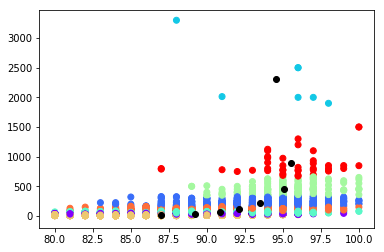

In [13]:
# Plotting results from k-means clustering based on points and price

plt.scatter(data.loc[:,'points'], data.loc[:,'price'], c=labels, cmap='rainbow')    
plt.scatter(cluster.cluster_centers_[:,0] ,cluster.cluster_centers_[:,1], color='black') 
plt.show()

# Conclusion

We ran GMM, KMeans, and attempted Agglomerative Clustering. We were able to run GMM and KMeans clustering on our data withput any issues. However, due to the size of our dataset ~125K entries, we were unable to successfuly run Agglomerative on our data. 

We used these clustering methods to explore and visulize our data, and were looking for valuble insights. 

We found that the most meaningfull cluster was using the GMM algorithm, and showed us that we have multiple different clusters of varying size and shape. We have clusters that are both densly populated and a wide distribution of points scattered across the visualization plot. 